In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
sns.set_context('notebook', font_scale=1.5)

In [72]:
def make_data(time, M, offset=0):
    N = len(time)
    x = np.sin(np.linspace(0, 4 * np.pi, N) + offset)
    data = pd.DataFrame(np.tile(x, (M, 1)).T + np.random.randn(N, M) / 5)
    data.index = time
    return data


In [89]:
M = 10
time = pd.date_range('9:00', '18:00', freq='5min')

data = []
for _ in range(4):
    data.append(make_data(time, M))
for _ in range(4):
    data.append(make_data(time, M, offset = 3))

directions = ['in', 'out'] * 4
day_types = ['week', 'week', 'weekend', 'weekend'] * 2
locations = ['front'] * 4 + ['back'] * 4
    
data_mean = []
for d, direction, day_type, location in zip(data, directions, day_types, locations):
    d_mean = pd.DataFrame(d.mean(1))
    d_mean = d_mean.rename(columns={0: 'value'})
    d_mean['direction'] = direction
    d_mean['day type'] = day_type
    d_mean['location'] = location
    d_mean['time'] = d_mean.index
    data_mean.append(d_mean)

dataset = pd.concat(data_mean)

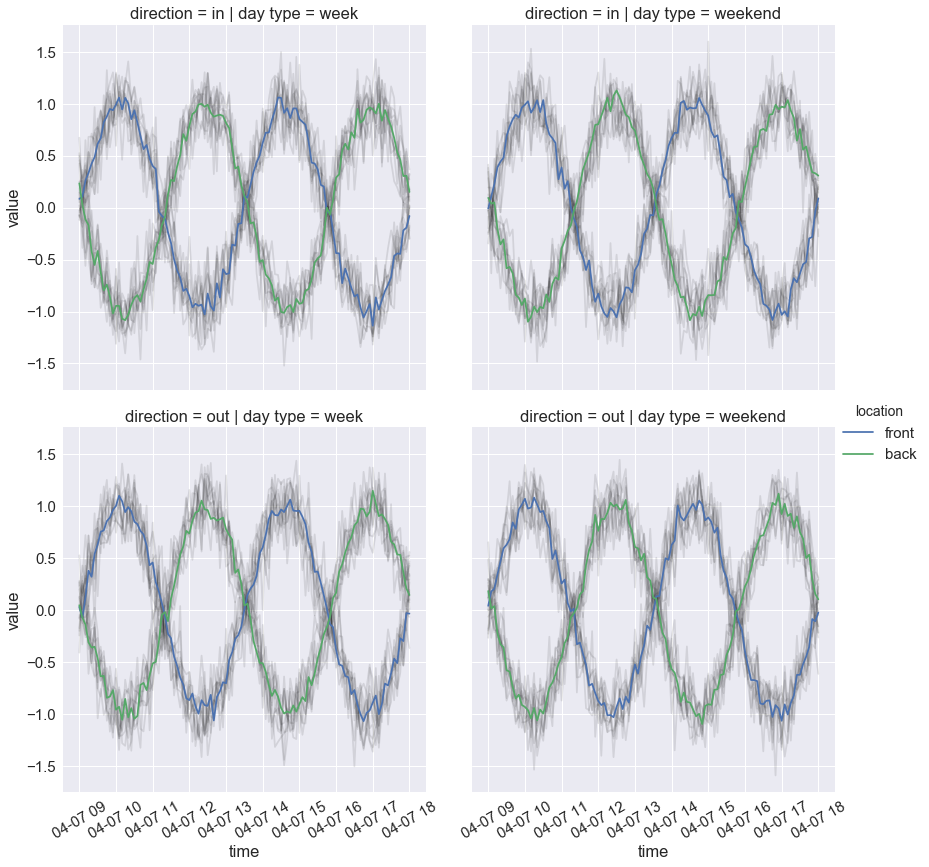

In [90]:
g = sns.FacetGrid(dataset, row='direction', col='day type', hue='location', size=6)
for index in range(4):
    ax = g.axes.flatten()[index]
    ax.plot(time, data[index], 'k', alpha=0.1)
    ax.plot(time, data[index + 4], 'k', alpha=0.1)
g.map(plt.plot_date, 'time', 'value', fmt='-')
g.set_xticklabels(rotation=30)
g.add_legend()